# LOAN PRICE PREDICTION SYSTEM

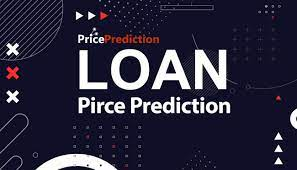

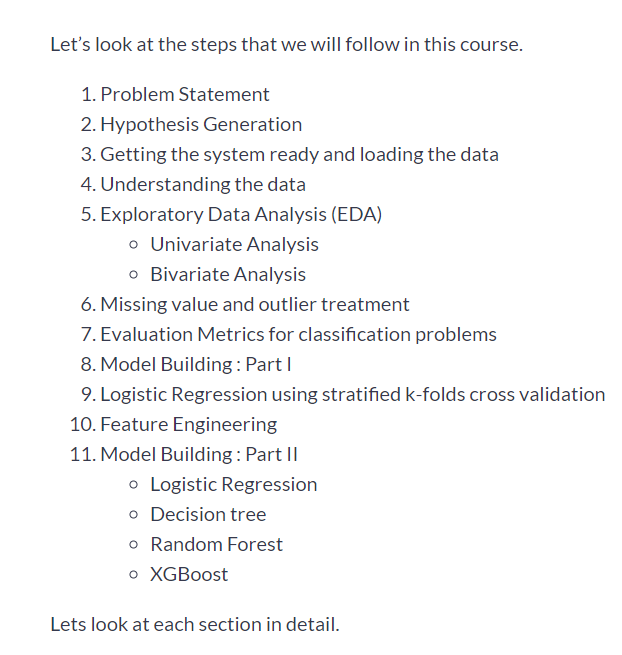

In [864]:
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Avoid warnings
import warnings
warnings.filterwarnings('ignore')

# statistics 
from scipy import stats as st
import pylab

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Basic Understanding Of Data

In [865]:
train=pd.read_csv("train_set.csv")

In [866]:
test=pd.read_csv("test_set.csv")

In [867]:
# making copy of dataset so we can't loose data
train_orignal=train.copy()
test_orignal=test.copy()

In [868]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [869]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [870]:
train.shape

(614, 13)

In [871]:
test.shape

(367, 12)

In [872]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [873]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [874]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [875]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [876]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [877]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Visualization

In [878]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [879]:
# Target Variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

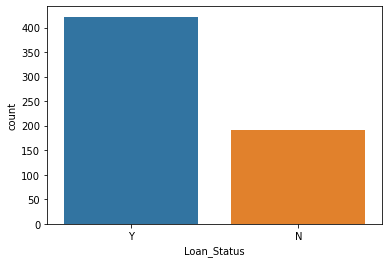

In [880]:
sns.countplot(train['Loan_Status'],data=train)

Now lets visualize each variable separately.

Different types of variables are Categorical, ordinal and numerical.

• Categorical features: These features have categories (Gender, Married, Self Employed, Credit_History, Loan_Status)
    
• Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
    
• Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

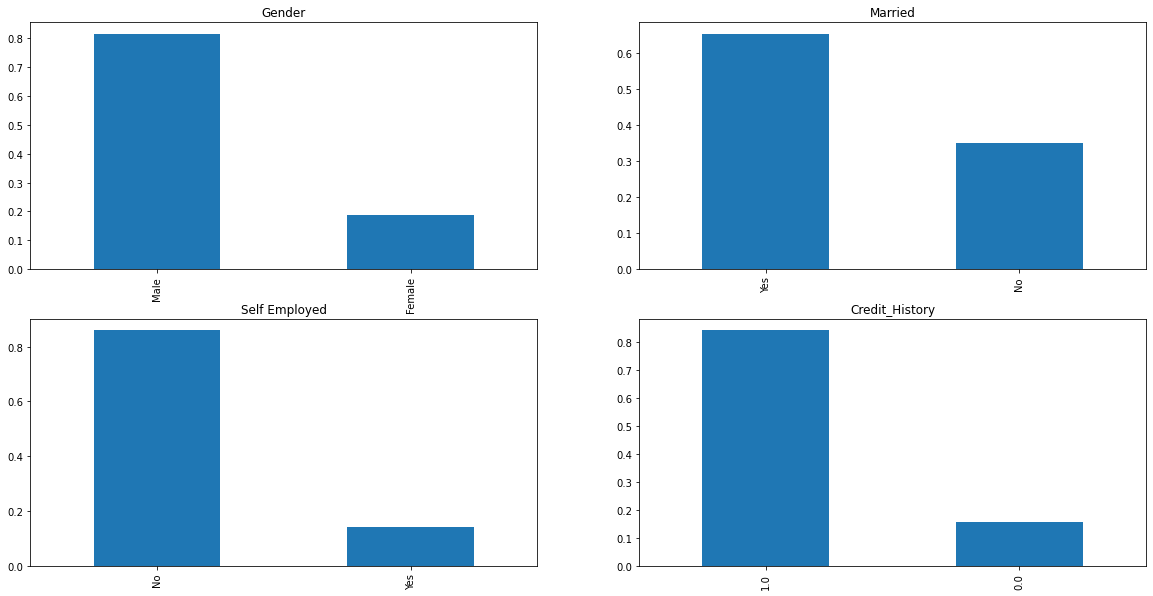

In [881]:
# Independent Variable (Categorical)
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts (normalize=True).plot.bar(figsize=(20,10), title = 'Gender')
plt.subplot(222)
train['Married'].value_counts (normalize=True).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts (normalize=True).plot.bar(title = 'Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts (normalize=True).plot.bar(title = 'Credit_History')
plt.show()

It can be inferred from the above bar plots that:

• 80% applicants in the dataset are male.

• Around 65% of the applicants in the dataset are married.

• Around 15% applicants in the dataset are self employed. 

• Around 85% applicants have repaid their debts.

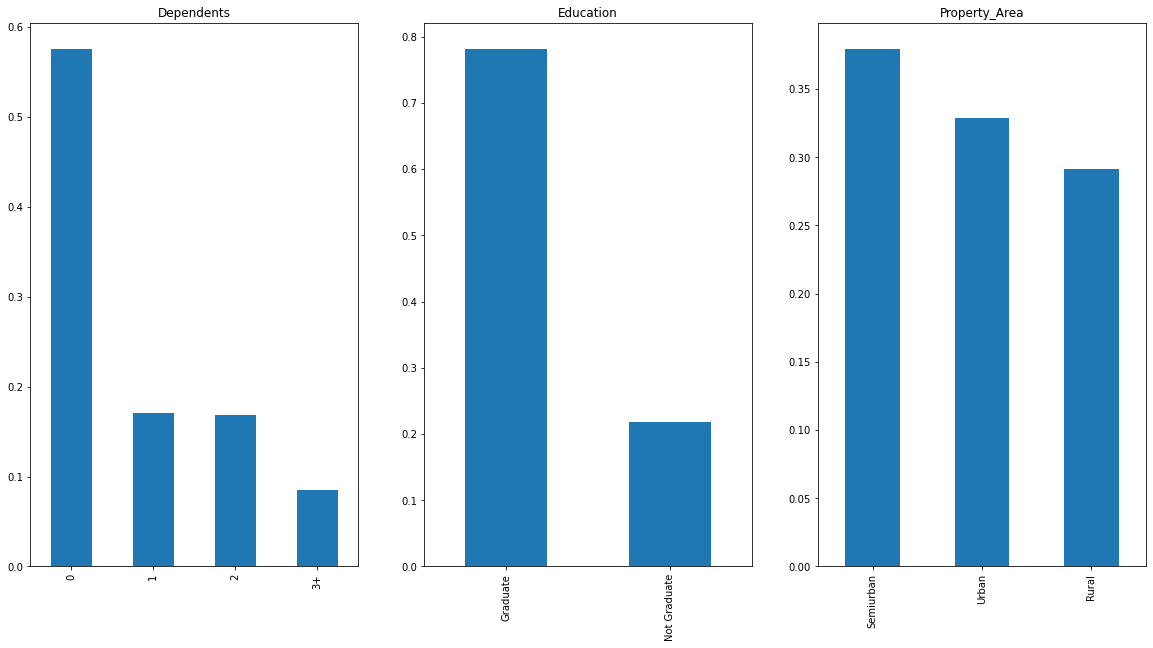

In [882]:
# Independent Variable (Ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts (normalize=True).plot.bar(figsize=(20,10), title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts (normalize=True).plot.bar(title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts (normalize=True).plot.bar(title = 'Property_Area')
plt.show()

Following inferences can be made from the above bar plots:
    
• Most of the applicants don't have any dependents. 

• Around 80% of the applicants are Graduate.

• Most of the applicants are from Semiurban area.

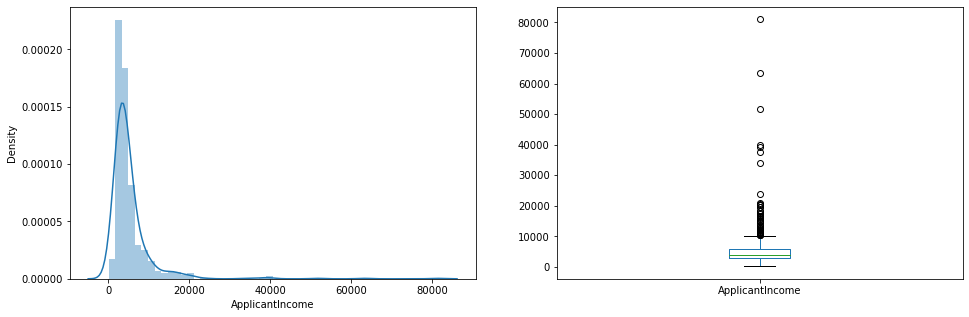

In [883]:
# Independent Variable (Numerical)
# ApplicantIncome, CoapplicantIncome, LoanAmount
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

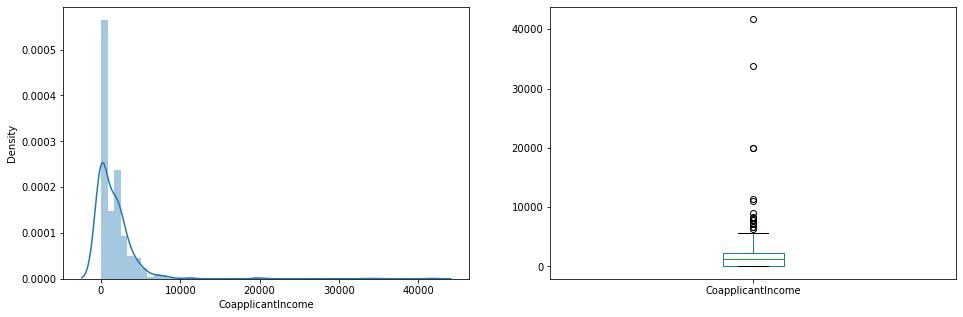

In [884]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

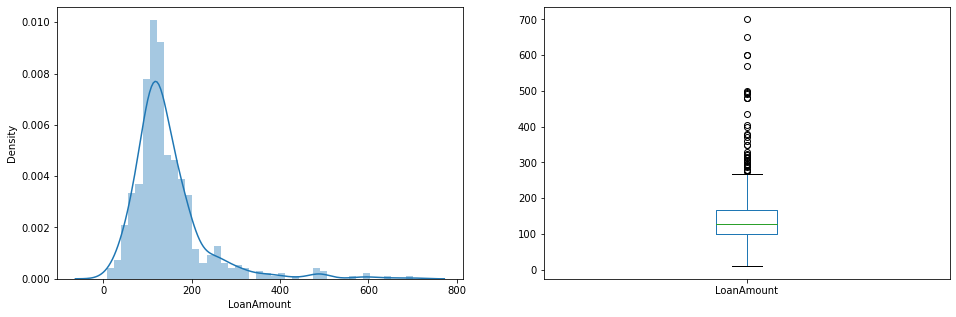

In [885]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Gender'>

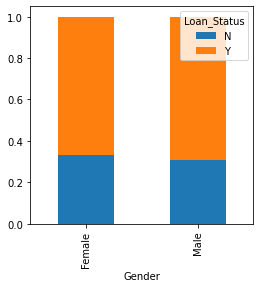

In [886]:
# Independent Variable (Categorical) VS Target Variable

Gender=pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum (1).astype (float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

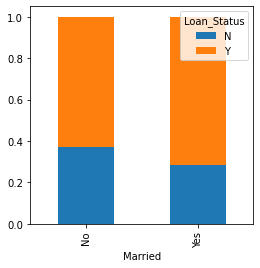

In [887]:
# (Gender, Married, Self Employed, Credit_History)
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

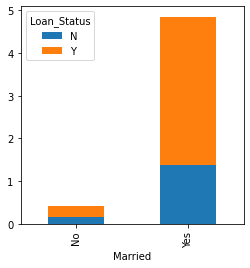

In [888]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

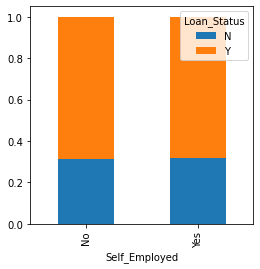

In [889]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

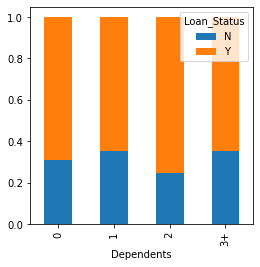

In [890]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

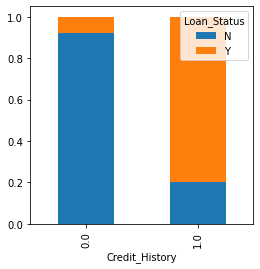

In [891]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

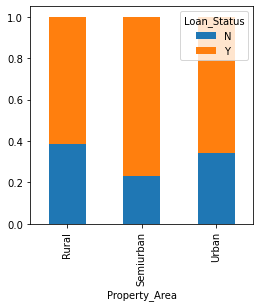

In [892]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

In [893]:
# Independent Variable (Numerical) VS Target Variable

In [894]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Loan_Status'>

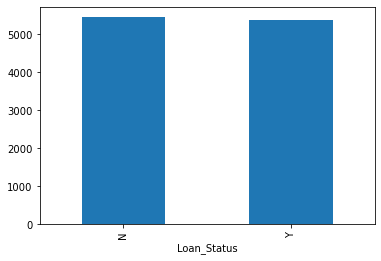

In [895]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<AxesSubplot:>

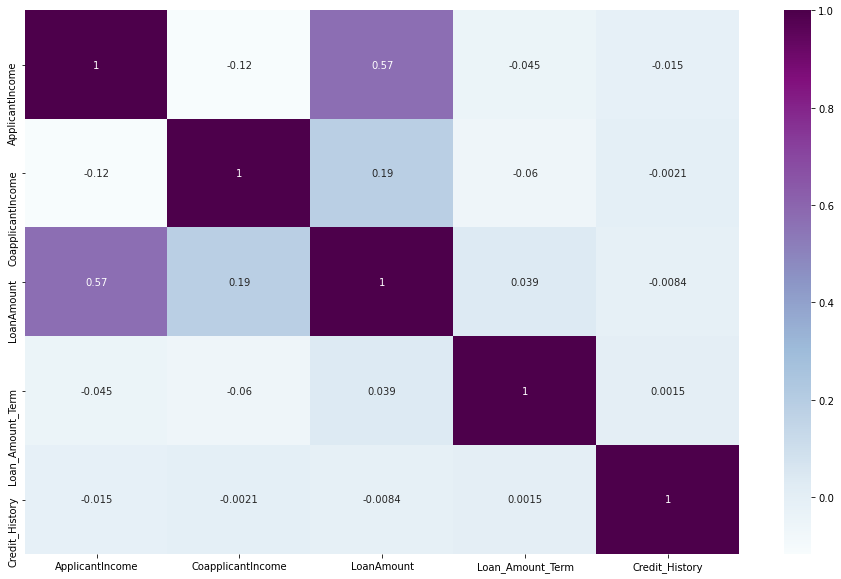

In [896]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),cmap='BuPu',annot=True)

# Handling Missing Values

In [897]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [898]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:
    
• For numerical variables: imputation using mean or median 
    
• For categorical variables: imputation using mode

In [899]:
train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [900]:
train['Gender'].mode()

0    Male
dtype: object

In [901]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [902]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [903]:
train['Married'].mode()

0    Yes
dtype: object

In [904]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [905]:
train['Self_Employed'].mode()

0    No
dtype: object

In [906]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [907]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [908]:
train['Dependents'].mode()

0    0
dtype: object

In [909]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [910]:
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [911]:
train['LoanAmount'].median()

128.0

In [912]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [913]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True) 

In [914]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [915]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [916]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True) 

In [917]:
test['LoanAmount'].median()

125.0

In [918]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [919]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Model building

In [920]:
train.drop(columns=['Loan_ID'],inplace=True)
test.drop(columns=['Loan_ID'],inplace=True)

In [921]:
train.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1


In [922]:
test.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [923]:
x=train.drop(columns=['Loan_Status'])
y=train['Loan_Status']

In [924]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [925]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [926]:
x=pd.get_dummies(x)

In [927]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [928]:
x['ApplicantIncome'].astype(int)


0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int32

In [929]:
x['CoapplicantIncome'].astype(int)


0         0
1      1508
2         0
3      2358
4         0
       ... 
609       0
610       0
611     240
612       0
613       0
Name: CoapplicantIncome, Length: 614, dtype: int32

In [930]:
x['LoanAmount'].astype(int)


0      128
1      128
2       66
3      120
4      141
      ... 
609     71
610     40
611    253
612    187
613    133
Name: LoanAmount, Length: 614, dtype: int32

In [931]:
x.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [932]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    uint8  
 6   Gender_Male              614 non-null    uint8  
 7   Married_No               614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_3             614 non-null    uint8  
 10  Dependents_0             614 non-null    uint8  
 11  Dependents_1             614 non-null    uint8  
 12  Dependents_2             614 non-null    uint8  
 13  Education_Graduate       614 non-null    uint8  
 14  Education_Not Graduate   6

In [933]:
train=pd.get_dummies(train)

In [934]:
test=pd.get_dummies(test)

In [935]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [936]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


# Feature Selection

Based on the domain knowledge, we can come up with new features that might affect the target variable.

We will create the following three new features:
    
• Total Income - As discussed during bivariate analysis we will combine the ApplicantIncome and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

• EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI's might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

• Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [955]:
train['Total_Income']=train ['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [956]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,1,5849.0
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,6091.0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,3000.0
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,1,4941.0
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,1,6000.0


In [957]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income
0,5720,0,110.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,5720
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,4576
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,6800
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,4886
4,3276,0,78.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,3276


In [958]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test ['LoanAmount']/test['Loan_Amount_Term']

In [959]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,1,0,1,0,0,0,1,5849.0,0.355556
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,6091.0,0.355556
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,3000.0,0.183333
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,1,1,0,0,0,1,4941.0,0.333333
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,1,0,1,0,0,0,1,6000.0,0.391667


In [960]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI
0,5720,0,110.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,5720,0.305556
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,4576,0.350000
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,...,1,1,0,1,0,0,0,1,6800,0.577778
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,...,1,1,0,1,0,0,0,1,4886,0.277778
4,3276,0,78.0,360.0,1.0,0,1,1,0,0,...,0,0,1,1,0,0,0,1,3276,0.216667


In [961]:
train['BalanceIncome']=train['Total_Income'] - (train['EMI']*1000) 
#Multiply with 1000 to make the units equal 
test['BalanceIncome']=test['Total_Income'] - (test['EMI']*1000)

In [962]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI,BalanceIncome
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,1,0,0,0,1,5849.0,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,1,0,1,0,0,6091.0,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,3000.0,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,1,1,0,0,0,1,4941.0,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,1,0,0,0,1,6000.0,0.391667,5608.333333


In [963]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI,BalanceIncome
0,5720,0,110.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,0,1,5720,0.305556,5414.444444
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,0,1,4576,0.350000,4226.000000
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,0,1,6800,0.577778,6222.222222
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,0,1,4886,0.277778,4608.222222
4,3276,0,78.0,360.0,1.0,0,1,1,0,0,...,0,1,1,0,0,0,1,3276,0.216667,3059.333333


# Model Building After Feature Enginerring

In [964]:
training_score2=[]
testing_score2=[]

In [965]:
X=train.drop(columns=['Loan_Status'])
Y=train['Loan_Status']

In [966]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
st=StandardScaler()
x_scaled=st.fit_transform(x)
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.2,random_state=4)

In [967]:
def model_pred_scaled(model):
    model.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    y_pred_train1=model.predict(x_train1)
    a = accuracy_score(y_train1,y_pred_train1)*100
    b = accuracy_score(y_test1,y_pred1)*100
    a.astype(int)
    b.astype(int)
    training_score2.append(a)
    testing_score2.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,y_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,y_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,y_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    
    matrix= confusion_matrix(y_test1,y_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix,annot=True,fmt="g",cmap="Set1")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 81.67006109979633
Accuracy_Score of LogisticRegression() model on Testing Data is: 79.67479674796748

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7788461538461539
Recall Score of LogisticRegression() model is: 0.9759036144578314
F1 Score of LogisticRegression() model is: 0.8663101604278075

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


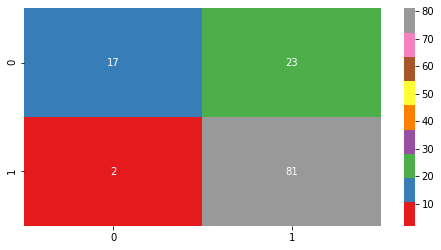

In [968]:
model_pred_scaled(LogisticRegression())

Accuracy_Score of SVC() model on Training Data is: 82.68839103869654
Accuracy_Score of SVC() model on Testing Data is: 78.86178861788618

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.7714285714285715
Recall Score of SVC() model is: 0.9759036144578314
F1 Score of SVC() model is: 0.8617021276595745

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


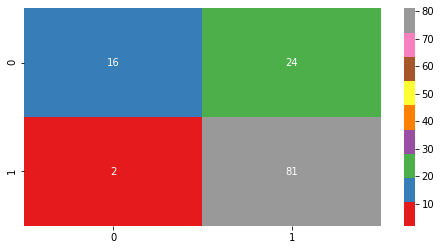

In [969]:
model_pred_scaled(SVC())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 79.63340122199592
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 65.85365853658537

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.6952380952380952
Recall Score of KNeighborsClassifier() model is: 0.8795180722891566
F1 Score of KNeighborsClassifier() model is: 0.7765957446808509

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


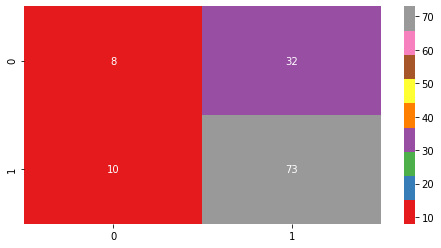

In [970]:
model_pred_scaled(KNeighborsClassifier())

In [971]:
def model_pred_unscaled(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    a = accuracy_score(y_train,y_pred_train)*100
    b = accuracy_score(y_test,y_pred)*100
    a.astype(int)
    b.astype(int)
    training_score2.append(a)
    testing_score2.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,y_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,y_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    
    matrix= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix,annot=True,fmt="g",cmap="Set1")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 65.85365853658537

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.6785714285714286
Recall Score of DecisionTreeClassifier() model is: 0.7916666666666666
F1 Score of DecisionTreeClassifier() model is: 0.7307692307692307

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


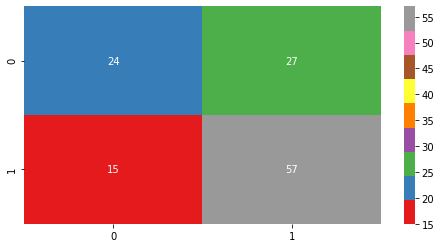

In [972]:
model_pred_unscaled(DecisionTreeClassifier())


Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 75.60975609756098

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.71
Recall Score of RandomForestClassifier() model is: 0.9861111111111112
F1 Score of RandomForestClassifier() model is: 0.8255813953488371

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


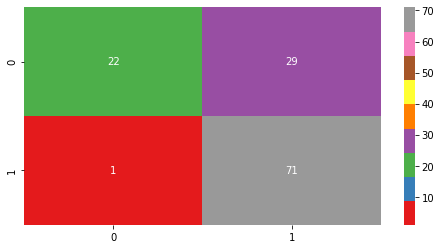

In [973]:
model_pred_unscaled(RandomForestClassifier())


Accuracy_Score of AdaBoostClassifier() model on Training Data is: 87.16904276985743
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 70.73170731707317

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.6836734693877551
Recall Score of AdaBoostClassifier() model is: 0.9305555555555556
F1 Score of AdaBoostClassifier() model is: 0.788235294117647

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


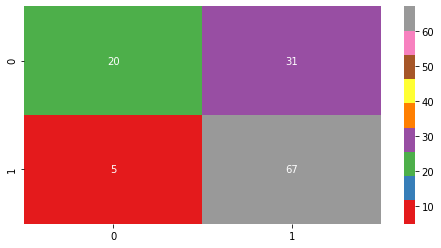

In [974]:
model_pred_unscaled(AdaBoostClassifier())


[20:40:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 100.0


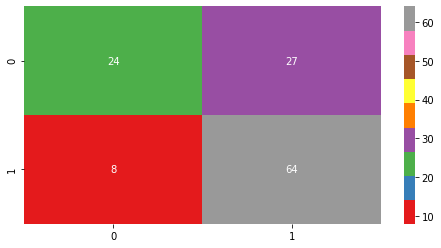

In [975]:
model_pred_unscaled(XGBClassifier(verbose=False))


Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000001DF78B29430> model on Training Data is: 90.4276985743381
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000001DF78B29430> model on Testing Data is: 75.60975609756098

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x000001DF78B29430> model is: 0.7058823529411765
Recall Score of <catboost.core.CatBoostClassifier object at 0x000001DF78B29430> model is: 1.0
F1 Score of <catboost.core.CatBoostClassifier object at 0x000001DF78B29430> model is: 0.8275862068965517

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x000001DF78B29430> model is:


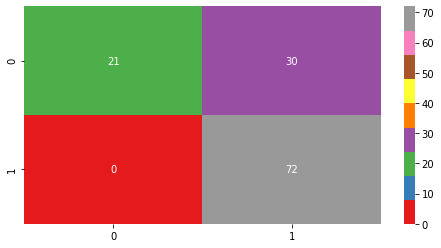

In [976]:
model_pred_unscaled(CatBoostClassifier(verbose=False))


Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 89.61303462321793
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 73.98373983739837

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7
Recall Score of GradientBoostingClassifier() model is: 0.9722222222222222
F1 Score of GradientBoostingClassifier() model is: 0.813953488372093

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


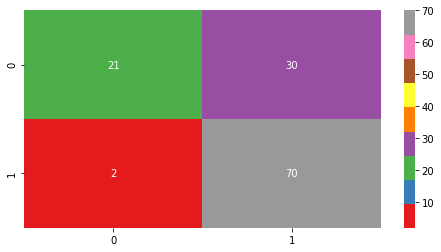

In [977]:
model_pred_unscaled(GradientBoostingClassifier())


Accuracy_Score of GaussianNB() model on Training Data is: 81.4663951120163
Accuracy_Score of GaussianNB() model on Testing Data is: 73.17073170731707

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.693069306930693
Recall Score of GaussianNB() model is: 0.9722222222222222
F1 Score of GaussianNB() model is: 0.8092485549132948

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


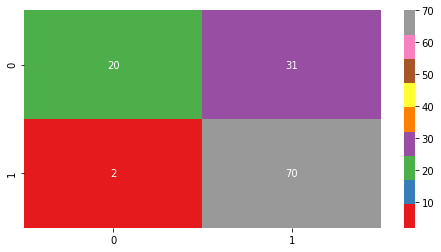

In [978]:
model_pred_unscaled(GaussianNB())


Accuracy_Score of BernoulliNB() model on Training Data is: 81.05906313645622
Accuracy_Score of BernoulliNB() model on Testing Data is: 71.54471544715447

------------------------------------------------------------------------
Precision Score of BernoulliNB() model is: 0.6989247311827957
Recall Score of BernoulliNB() model is: 0.9027777777777778
F1 Score of BernoulliNB() model is: 0.7878787878787878

------------------------------------------------------------------------
Confusion Matrix of BernoulliNB() model is:


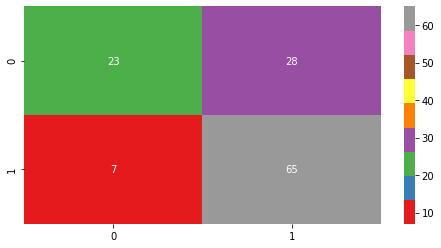

In [979]:
model_pred_unscaled(BernoulliNB())

In [980]:
df2=pd.DataFrame({"Models":MODEL,
                "Training_Score":training_score2,
                 "Testing_Score":testing_score2})
df2

,Models,Training_Score,Testing_Score
0,Logistic Regression,81.670061,79.674797
1,KNN,82.688391,78.861789
2,SVM,79.633401,65.853659
3,Decision Tree,100.000000,65.853659
4,Random Forest,100.000000,75.609756
5,Ada Boost,87.169043,70.731707
6,XGBClassifier,100.000000,71.544715
7,CatBoosting,90.427699,75.609756
8,GradientBoosting,89.613035,73.983740
9,GaussianNB,81.466395,73.170732


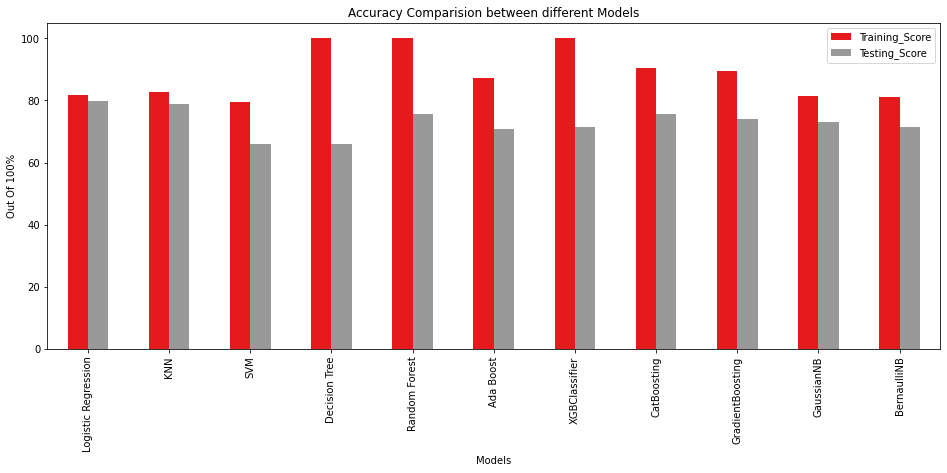

In [981]:
df2.plot(x='Models',y=['Training_Score','Testing_Score'],kind='bar',colormap="Set1",figsize=(16,6))
plt.title("Accuracy Comparision between different Models")
plt.xlabel("Models")
plt.ylabel("Out Of 100%")
plt.show()